# Lab 4.4: Confidence Intervals

## Outline

- z-score
- t-distribution
- Confidence Interval Basics
- Confidence Interval for One Sample Mean

**Question 1**

1) Write down the standard Normal distribution.

   <br>

N~(

2) z-score measures how many `__________` a value is from the mean.
   - units
   - variances
   - standard deviations
   - medians
   - modes

   <br>

In [1]:
#standard deviations

3) Given a Normal distribution that has mean of 10.5 and variance of 3.2, compute the
   - z-score for observing a value of 8.3
   - probability of observing a z-score greater than the calculated value above
   
   <br>

In [25]:
##### from scipy.stats import norm
from math import sqrt
num = (8.3-10.5)/sqrt(3.2)
print(num)

norm_dist=norm(10.5,sqrt(3.2))

1-norm.cdf(num)

-1.229837387624884


0.89062099773330372

4) Verify that the probability of observing a z-score greater than calculated in `3.` is same that the probability of observing a value greater than 8.3 from the original Normal distribution (with mean 10.5 and variance 3.2).  

   <br>

In [26]:
1-norm(10.5,sqrt(3.2)).cdf(8.3)

0.89062099773330372

   
5) For the standard Normal random variable $Z$, compute the following: 
1. $P(0.2 < Z \leq 1.4)$
2. $P(-1.48 \leq Z \leq 0.4)$
3. $P(Z > 1.23)$
4. $E(3 + 3Z)$
5. $Var(3 + 3Z)$  

   <br>

In [29]:
norm.cdf(1.4)-norm.cdf(.2000000001)

0.33998363128802167

In [30]:
norm.cdf(.4)-norm.cdf(-1.48)

0.5859851182769924

In [31]:
1-norm.cdf(1.23)

0.10934855242569186

In [34]:
3

3

9+9*var(z)

**Question 2**
   
1) Visually, what is the difference between a t-distribution and a standard Normal distribution? 

   <br> 

t-distribution has fatter tails and s shorter peak with smaller N than the normal distribution. As N increases, the t-distribution begins to approximates the normal distribution. T-distribution depends on degrees of freedom.

   
2) Plot the pdf of the following distributions.  

* Standard Normal $N(0, 1)$
* $t_{5}$
* $t_{10}$
* $t_{100}$
* $t_{10000}$
   
   <br>

Populating the interactive namespace from numpy and matplotlib


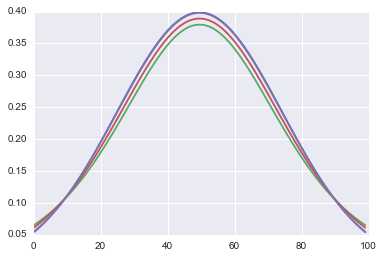

In [73]:
import seaborn as sns
import numpy as np
from scipy import stats
%pylab inline
x=[item for item in np.linspace(-2,2,100)]

data=stats.norm.pdf(x)

plot( data)
plot(stats.t(5).pdf(x))
plot(stats.t(10).pdf(x))
plot(stats.t(100).pdf(x));

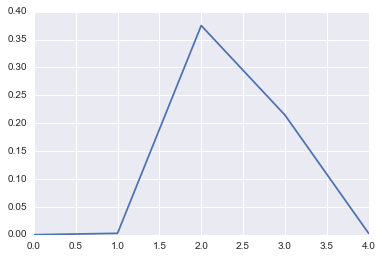

In [60]:

t5 = plt.plot(stats.t.pdf([-10,-5,0,1,5],4))


3) Comment on the plots. How does the shape of t-distribution change as the degrees of freedom change?   

   <br>

**Question 3**

1) Explain why confidence interval is more informative than a point estimate.

   <br>

A point estimate attempts to sum up a distribution in one number. However, you do not know what the underlying variace in the population is. confidence intervals show this variance to you.

2) Explain why the following statement is **wrong**:
   - The 95% confidence interval means there is a 95% chance that the true value lies in the interval|
   
   <br>

You do not have a  95%  chacne of observing the mean for ANY GIVEN confidence interval. Over all confidence intervals, there is a 95% chance of observing the true value.

3) Explain in plain words what the following means:
   - The 95% confidence interval of the click through rate to website A is 0.10 to 0.15

   <br>

4) You are presented with 2 measurements below, select the measurement that is more precise and explain why that is.
   - **Measurement 1**: 5.00 cm with 95% confidence interval of (4.52 cm, 5.52 cm)
   - **Measurement 2**: 5.20 cm with 95% confidence interval of (5.13 cm, 5.22 cm)

   <br>

$5.00 +/ SE *2 (4.52,5.52)$



In [82]:
#5.52=5.0 + SE*2

print((5.52-5)/2,'1')
print((5.22-5.20)/2,'2')
#h=2*(5.52)

#l

0.2599999999999998 1
0.009999999999999787 2


5) Is a 99% confidence interval wider or narrower than a 90% confidence interval?  

   <br>

**Question 4**

1) Suppose Google sampled 200 of its employees and measured how long they are gone for lunch. 
   - Download the data from https://s3-us-west-2.amazonaws.com/dsci/6002/data/lunch_hour.txt (right click -> "Save Link As...")
   - Load the data by `numpy.loadtxt('lunch_hour_200.txt')`
   - Compute the mean lunch hour of the sample
   - Compute the 95% confidence interval for how long, on average, Google employees take to have lunch.
     (**_There is a python function to calculate this, which you will use later to verify your results; for this part, calculate it by following the formula given in class_**)

   <br>

In [91]:
data =np.loadtxt('lunch_hour.txt')
import pandas as pd
data=pd.DataFrame(data)

COnfidence Interval

mean 

In [123]:
data.head()
p_mean = data.mean()
p_std= data.std()
standard_error = p_std/sqrt(data.count())

print(p_mean+2*standard_error,p_mean-2*standard_error)


0    2.266352
dtype: float64 0    2.102648
dtype: float64


   
2) Suppose only the first 20 employees are sampled. Re-compute the 95% confidence interval based on this smaller sample.

   <br>

In [132]:
import pandas as pd
data=pd.DataFrame(data)
data_twenty = data[0:20]
mean = data_twenty.mean()
std = data_twenty.std()

ste = (data_twenty.std())/sqrt(20)
print(ste)
mean

0    0.14
dtype: float64


0    2.16
dtype: float64

   
3) Use the following Python functions to verify your results above (which one should you use?):

```python
# Function to calculate z-based 95% CI
scipy.stats.norm.interval(0.05, mean, std)

# Function to calculate t-based 95% with 19 degrees of freedom
scipy.stats.t.interval(0.05, 19, mean, std)
```

   <br>

In [135]:
stats.t.interval(.95, 19, mean, ste)

(array([ 1.86697663]), array([ 2.45302337]))

**Question 5**

A survey is planned to determine the mean annual family medical expenses of employees of a large company. The management of the company wishes to be 95% confident that the sample mean is
correct to within +/- \$50 of the true population mean of annual family medical expenses. A pilot
study indicated the population standard deviation can be estimated to be $400.  

1) How large a sample size is needed?  


2) If management wants to be correct to within +/- \$25, what sample size is necessary?  


95% confidence

t=  1.98

df = 399

50 = 1.98*400 / sqrt(n)

In [138]:
(1.96*400/50)**2

245.86239999999998

In [140]:
(1.96*400/25)**2

983.4495999999999